In [116]:
import keras.layers
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img
import cv2
import matplotlib.pyplot as plt
from keras.utils import img_to_array
from tensorflow.keras.models import load_model

In [117]:
base_dir = r"/Users/xuxuruoning/PycharmProjects/pythonProject2/data/train"


In [118]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

#pre=processing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_datagen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen = test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 28207 images belonging to 5 classes.
Found 3131 images belonging to 5 classes.


keras.preprocessing.image.DirectoryIterator

In [119]:
cnn = tf.keras.Sequential()
cnn.add(keras.layers.Conv2D(filters=64, padding='same', strides=2, kernel_size=3, activation='relu', input_shape=(224,224,3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(5, activation='softmax'))

In [120]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 24, 24, 64)        1792      
                                                                 
 batch_normalization_39 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 6, 6, 128)         204928    
                                                                 
 batch_normalization_40 (Bat  (None, 6, 6, 128)      

In [ ]:

cnn.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/48


2023-05-11 20:56:04.502915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


221/221 [==============================] - ETA: 0s - loss: 1.8160 - accuracy: 0.2478

2023-05-11 20:58:22.961480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


221/221 [==============================] - 142s 620ms/step - loss: 1.8160 - accuracy: 0.2478 - val_loss: 1.6425 - val_accuracy: 0.2868 - lr: 1.0000e-04
Epoch 2/48
221/221 [==============================] - 111s 501ms/step - loss: 1.7229 - accuracy: 0.2706 - val_loss: 1.5853 - val_accuracy: 0.3082 - lr: 1.0000e-04
Epoch 3/48
221/221 [==============================] - 108s 486ms/step - loss: 1.6636 - accuracy: 0.2926 - val_loss: 1.5310 - val_accuracy: 0.3481 - lr: 1.0000e-04
Epoch 4/48
221/221 [==============================] - 163s 738ms/step - loss: 1.6337 - accuracy: 0.3034 - val_loss: 1.4852 - val_accuracy: 0.3730 - lr: 1.0000e-04
Epoch 5/48
221/221 [==============================] - 113s 511ms/step - loss: 1.6026 - accuracy: 0.3228 - val_loss: 1.4468 - val_accuracy: 0.4043 - lr: 1.0000e-04
Epoch 6/48
221/221 [==============================] - 105s 473ms/step - loss: 1.5779 - accuracy: 0.3354 - val_loss: 1.4130 - val_accuracy: 0.4111 - lr: 1.0000e-04
Epoch 7/48
221/221 [=============

In [ ]:

def predict_which(rslt):
    l = ["angry", "fear", "happy", "neutral", "sad"]
    l1 = []
    for i in range(4):
        l1.append(rslt[0][i])
    m = l1.index(max(l1))
    return l[m]


In [88]:
img_pred = load_img("/Users/xuxuruoning/PycharmProjects/pythonProject2/data/validation/angry/377.jpg",
target_size = (224,224))
i = img_to_array(img_pred)
i = np.expand_dims(i, axis=0)
rslt = cnn.predict(i)
print(predict_which(rslt))

1/1 [==============================] - 1s 671ms/step
angry


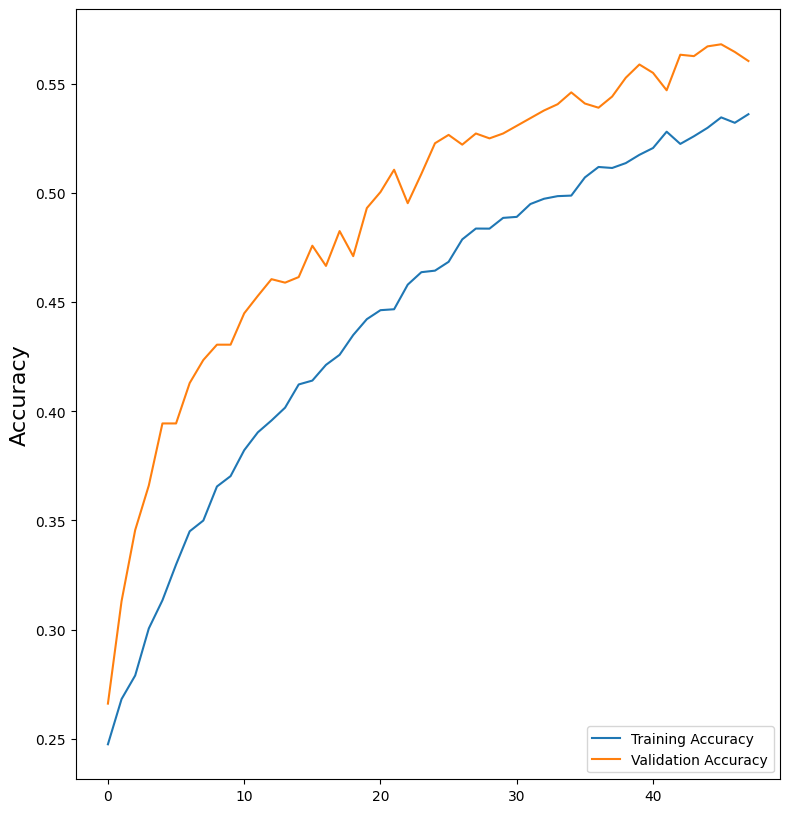